In [ ]:
'''
클러스터링은 주어진 데이터에 대한 명시적인 정보가 많지 않을 때 유용하게 쓸수있는 머신러닝 기법 중 하나입니다. 
다양한 사용자 정보를 이용해 몇가지 고객군으로 분류하여 고객군별 맞춤 전략을 도출한다던지, 유사한 상품(동영상, 음원까지도)군의 
속성을 분석하여 의미있는 인사이트를 도출하는 것에 활용됩니다.

[scikit learn - Clustering](https://scikit-learn.org/stable/modules/clustering.html)
[K-Means 클러스터링](https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/)
[Affinity Propagation](https://datascienceschool.net/view-notebook/3bd9864b09d0466995134220f6779d6d/)
[Matplotlib의 여러가지 플롯](https://datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/)
[분류용 가상 데이터 생성](https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/)
[분류용 예제 데이터](https://datascienceschool.net/view-notebook/577a01e24d4f456bb5060da6e47054e1/)
[분류 성능평가](https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/)
[클러스터링을 평가하는 척도 - Mutual Information](https://yjucho1.github.io/clustering/mutual-information/)
'''

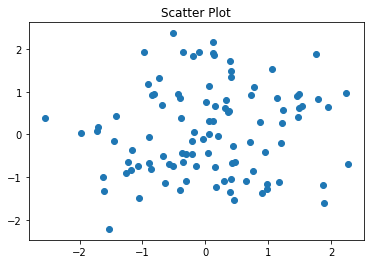

In [30]:
'''
선행 학습
scatter chart
'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
# plt.scatter([1,2,3,4,5], [5,4,3,2,1])
plt.show()

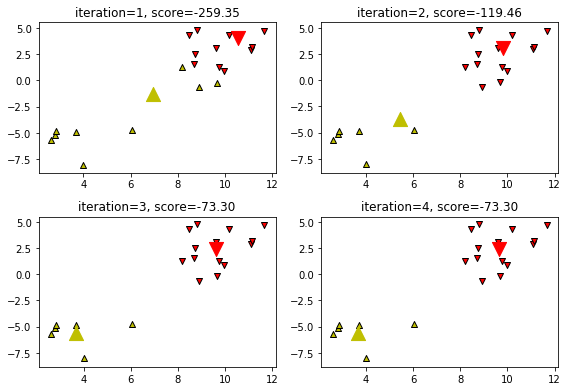

In [91]:
'''
2차원 데어터의 clustering
'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 분류용 가상 데이터 생성¶
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
X, _ = make_blobs(n_samples=20, n_features=2, random_state=4)

def plot_KMeans(n):
    # n_clusters: 클러스터의 갯수
    # init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨.
    # n_init: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
    # max_iter: 최대 반복 횟수.
    # random_state: 시드값.
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))
    
#     print(X)
#     print(X[model.labels_ == 0, 0])
#     print(X[model.labels_ == 0, 1])
#     print(X[model.labels_ == 1, 0])
#     print(X[model.labels_ == 1, 1])
    
plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

In [115]:
'''
다차원 데어터의 k-means clustering
'''
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

# print(y_pred)
# for i in range(10):
#     print(y_pred[y_pred == i])
print(model) 

# def show_digits(images, labels):
#     f = plt.figure(figsize=(8, 2))
#     i = 0
#     while (i < 10 and i < images.shape[0]):
#         ax = f.add_subplot(1, 10, i + 1)
#         ax.imshow(images[i], cmap=plt.cm.bone)
#         ax.grid(False)
#         ax.set_title(labels[i])
#         ax.xaxis.set_ticks([])
#         ax.yaxis.set_ticks([])
#         plt.tight_layout()
#         i += 1
        
# def show_cluster(images, y_pred, cluster_number):
#     images = images[y_pred == cluster_number]
#     y_pred = y_pred[y_pred == cluster_number]
#     show_digits(images, y_pred)
    
# for i in range(10):
#     show_cluster(digits.images, y_pred, i)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [89]:
'''
분류 성능평가, 봐도 잘 모르겠음
'''
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [116]:
'''
clustering 성능평가
'''
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

# supervised
print("NMI:", normalized_mutual_info_score(digits.target, y_pred))
print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))

# unsupervised (cluster 의 거리로 계산, 1에 가까울 수록 좋은결과)
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

NMI: 0.7468903554645795
ARI: 0.6686991223627669
AMI: 0.7397973157276612
Silhouette Score: 0.18251916424600556


/home/jhkim/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jhkim/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [118]:
'''
Affinity Propagation

모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

responsibility  r(i,k) 
k 번째 데이터가  i 번째 데이터의 대표가 되어야 한다는 근거
availability  a(i,k) 
i 번째 데이터가  k 번째 데이터를 대표로 선택해야 한다는 근거
'''
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

model = AffinityPropagation(preference=-50).fit(X)

cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/home/jhkim/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


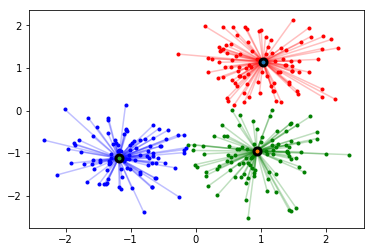

In [120]:
from itertools import cycle

colors = cycle('rgb')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()